<a href="https://colab.research.google.com/github/sonohatamashiro/DeepLearning2022Late/blob/main/DogVsCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras を使用したディープラーニングをやってみる
#画像認識を行う

### ライブラリの読み込み

In [1]:
%matplotlib inline
from keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
#import sys#←システム関連の操作のこと。

###学習済みモデルの読み込み

In [2]:
model = VGG16( weights='imagenet' )
#今回はmodelが学習モデル

553476096/553467096 [==============================] - 9s 0us/step


### 画像判定のための関数

In [3]:
def predict( filename, featuresize):#←ここでファイルの名前とサイズを貰う
  img = image.load_img(filename, target_size=(224, 224))#←ここでimgにさっきのを渡す
  x = image.img_to_array(img)
  x = np.expand_dims( x, axis=0 )#←xが配列の関数
  # 学習モデルで判定を実行
  preds = model.predict( preprocess_input(x))#←predictで実行。返した値をresultsに入れる
  results = decode_predictions( preds, top=featuresize )[0]
  return results
#関数終わり

### 画像表示のための関数

In [4]:
def showimg( filename, title, i):#←ファイルの名前などの取得
  im = Image.open(filename) #画像ファイルを開く
  im_list = np.array(im) #画像ビットデータをndarrayにする
  plt.subplot( 2, 5, i)
  plt.title( title )
  plt.axis( "off" )#←今回、罫線はoff
  plt.imshow(im_list)#←写真を参照
# 関数終わり(゜゜)～(゜゜)～(゜゜)～

### Kaggeにある画像データを利用する
https://www.kaggle.com/<br>
犬猫判定用の画像データ<br>
https://www.kaggle.com/c/dogs-vs-cats/data

##指定されたURLからファイルをダウンロードする

In [5]:
# wgetでwebからファイルをダウンロードする
# GoogleColabでコマンドを実行するときは、先頭に!マークを必ずつけること
# 小さいファイルをGoogleドライブからDLする時は、以下のようにURLをつけるだけでOK!
#!wget#←リナックスなどの言語を実行する時は先頭に!をつける！！(=ﾟωﾟ)ﾉ
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt

--2022-10-04 00:56:57--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 142.251.8.113, 142.251.8.139, 142.251.8.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ftumakgabc31r5ef069kunbgpa4r0h33/1664844975000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=8f00ec09-bd30-4370-94d4-39c33b97733f [following]
--2022-10-04 00:56:58--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ftumakgabc31r5ef069kunbgpa4r0h33/1664844975000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=8f00ec09-bd30-4370-94d4-39c33b97733f
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 108.177.125.132

##Colbに自分のGoogleアカウントのドライブをマウントする

In [6]:
# googleドライブを操作するモジュールをimport
from google.colab import drive
# googleドライブをマウント
drive.mount('/content/drive')


Mounted at /content/drive


#DLしてきたファイルをマウントしたディレクトリにコピーする

In [7]:
# コピーファイルを置くディレクトリを作る
import os
dir_path = "/content/drive/My Drive/2022LATE"
os.makedirs( dir_path, exist_ok=True)
!pwd #今いるディレクトリを表示
!cp train.zip "/content/drive/My Drive/2022LATE" # ファイルをコピー
#↑ファイルをコピーする際には""(ダブルコーテーション)の横に半角スペースを置かないと文字を連結しちゃってコピーできない。
# test.zipはいったん使わないのでコピーしない

/content


##GoogleドライブからColabへファイルをコピー

In [8]:
!cp "/content/drive/My Drive/2022LATE/train.zip" .

##zipファイルを解凍する

In [9]:
# unzipコマンドで解凍
!unzip -o -q "train.zip" 
print("zip解凍完了")

zip解凍完了


## 解凍した画像を使って画像判定させる

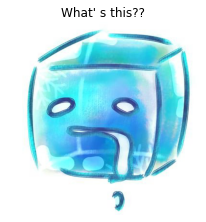

('n03908714', 'pencil_sharpener', 0.58297384)
('n04251144', 'snorkel', 0.09717129)
('n03127747', 'crash_helmet', 0.09531765)
('n03724870', 'mask', 0.029048761)
('n04209133', 'shower_cap', 0.027928993)
('n03935335', 'piggy_bank', 0.013916856)
('n02807133', 'bathing_cap', 0.012487927)
('n04254120', 'soap_dispenser', 0.0124649275)
('n03840681', 'ocarina', 0.010524718)
('n02910353', 'buckle', 0.008627149)


In [22]:
# 画像を指定する変数
filename = "koori.jpg"#←表示させたい画像を指定 
plt.figure( figsize=(20, 10) )#←ファイルサイズを指定
for i in range(1):#←何回画像をループさせるか。
  showimg(filename, "What' s this??", i+1 )
#ループ終わり
plt.show()#←画像の表示

result = predict( filename, 10 )#←表示した画像を判定
for result in result:
  print(result)